In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from seaborn import set_style
import statsmodels.tsa.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima
set_style("whitegrid")

In [3]:
stock_symbols = ['GOOG','MSFT','AMZN','NVDA','AAPL']

In [36]:
df = [pd.read_csv(f'/home/hirak/Desktop/Erdos/SIGNS_2024/stock_data/{symbol}/stock_price.csv') for symbol in stock_symbols]

In [22]:
len(df)

5

In [37]:
df_close = [df[i][["Close"]].copy() for i in range(len(df))]

In [38]:
df_close_sma = [df_close[i].rolling(window=14).mean() for i in range(len(df))]

In [39]:
df_close = [df_close[i][14:] for i in range(len(df))]
df_close_sma = [df_close_sma[i][14:] for i in range(len(df))]

In [62]:
df_close[0].head(-5)

,Close
14,15.182666
15,15.402054
16,15.317329
17,15.324534
18,14.931973
...,...
3447,158.990005
3448,160.279999
3449,160.809998
3450,163.240005


In [61]:
df_close_sma[0].head(-5)

,Close
14,15.351314
15,15.382886
16,15.396072
17,15.401911
18,15.374492
...,...
3447,157.817761
3448,157.397670
3449,157.149546
3450,157.153462


In [63]:
for i in range(len(df_close_sma)):
    result = adfuller(df_close_sma[i].Close.dropna())
    print(f'ADF statistic: {result[0]}')
    print(f'p-value: {result[1]}')

ADF statistic: 0.2488004604477506
p-value: 0.9748696156176361
ADF statistic: 1.462930240860932
p-value: 0.9973820860273647
ADF statistic: -0.21707129209394604
p-value: 0.9364559368381958
ADF statistic: 4.867917664692226
p-value: 1.0
ADF statistic: 0.9608229048652772
p-value: 0.9938348937564851


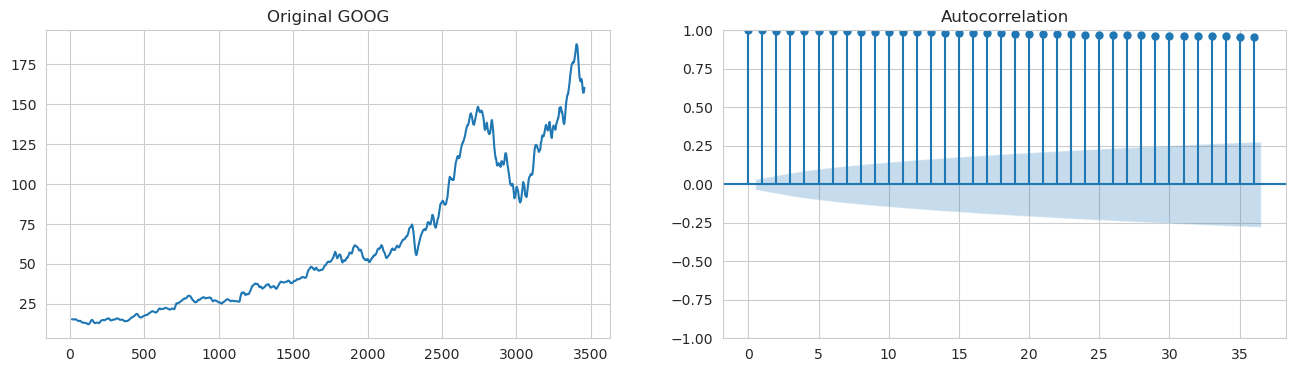

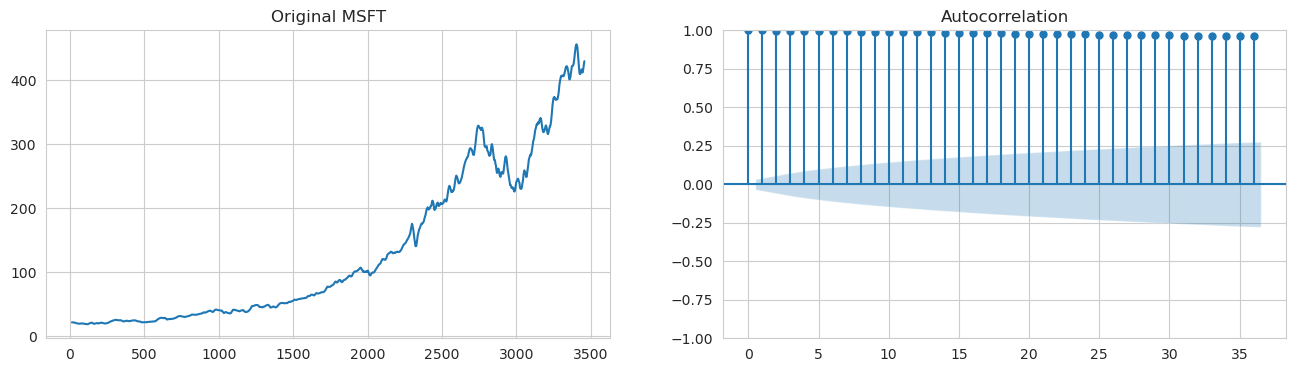

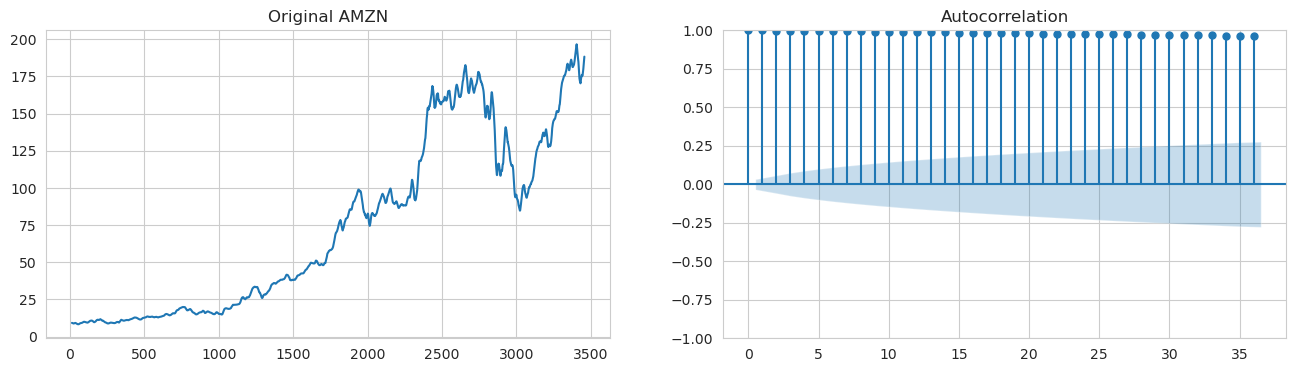

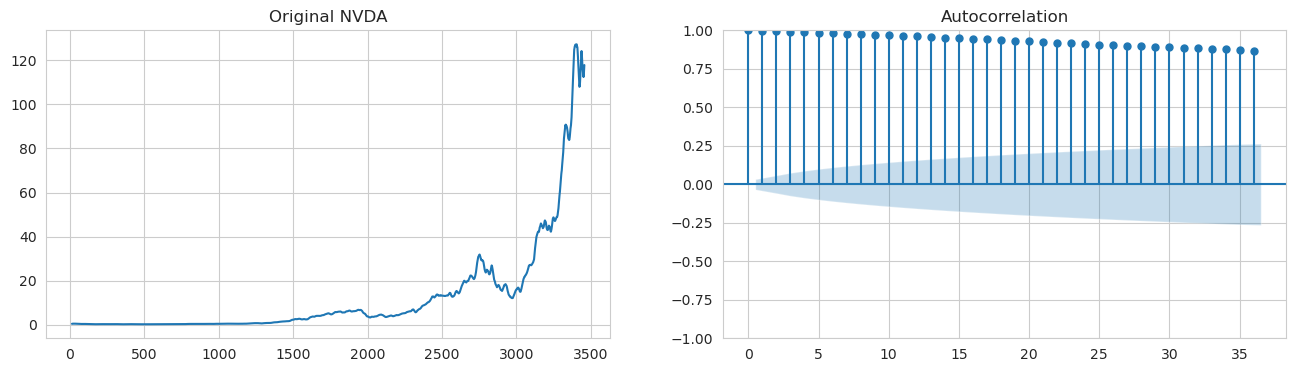

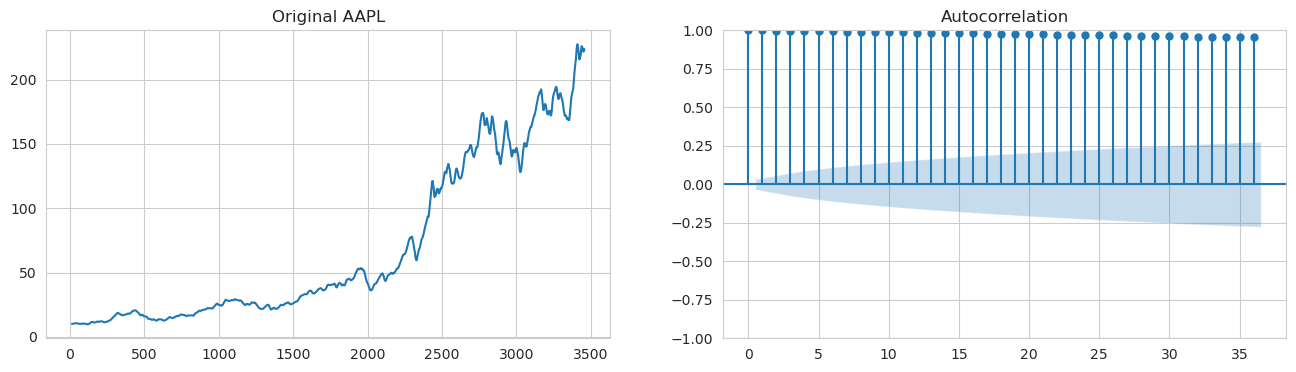

In [44]:
for i in range(len(df_close_sma)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(df_close_sma[i])
    ax1.set_title(f"Original {stock_symbols[i]}")
    plot_acf(df_close_sma[i], ax=ax2);

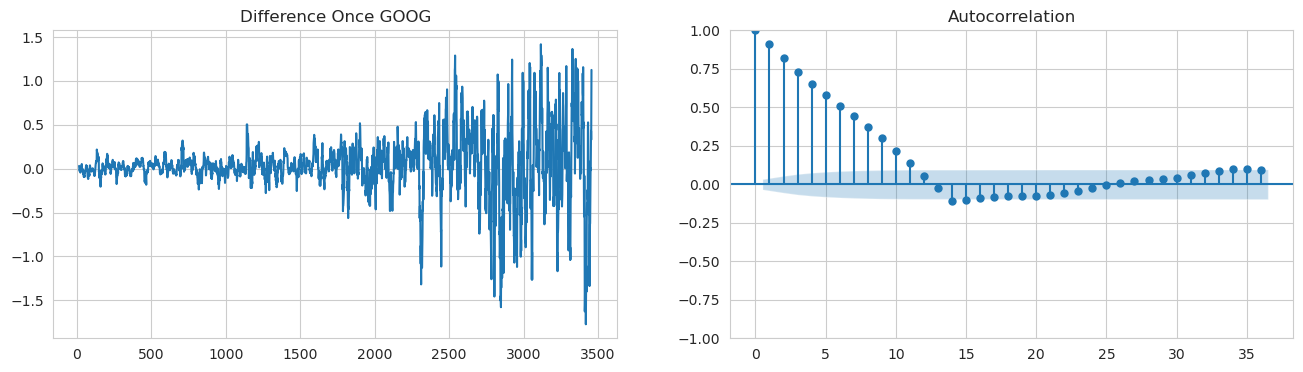

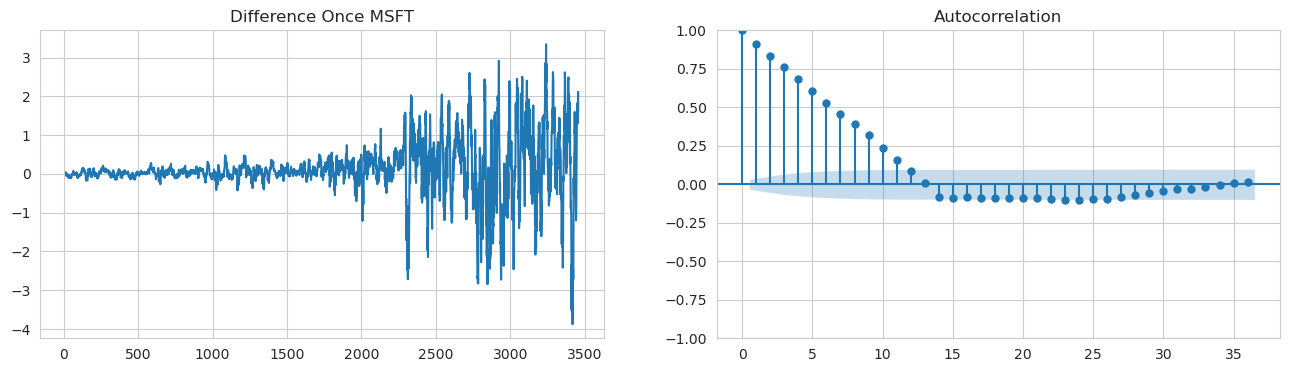

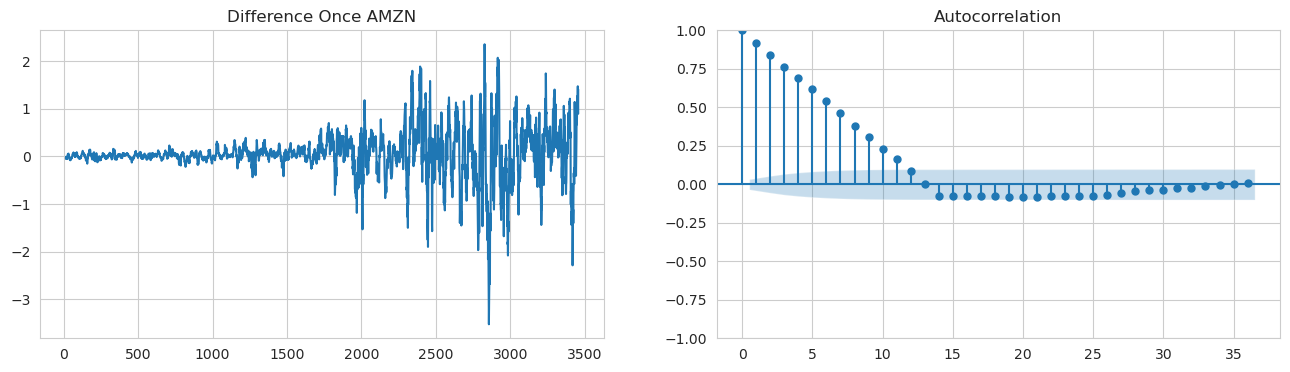

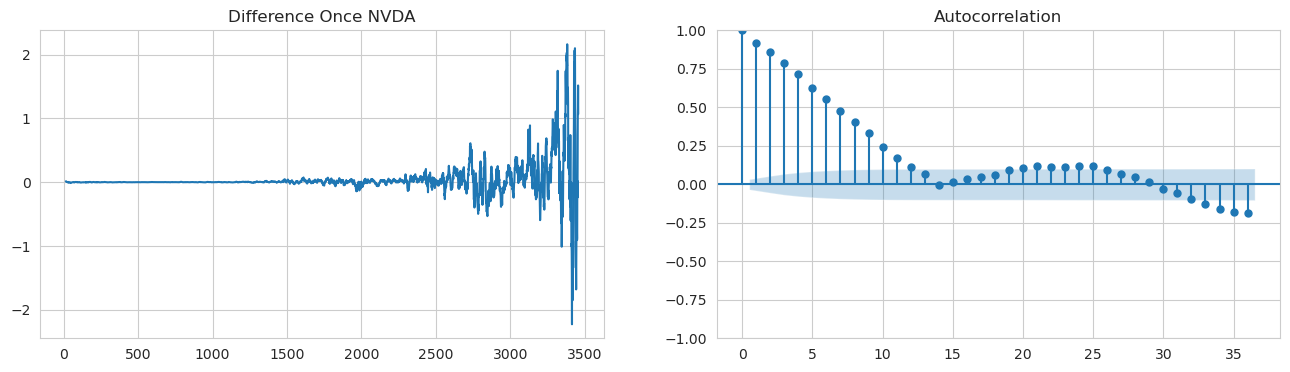

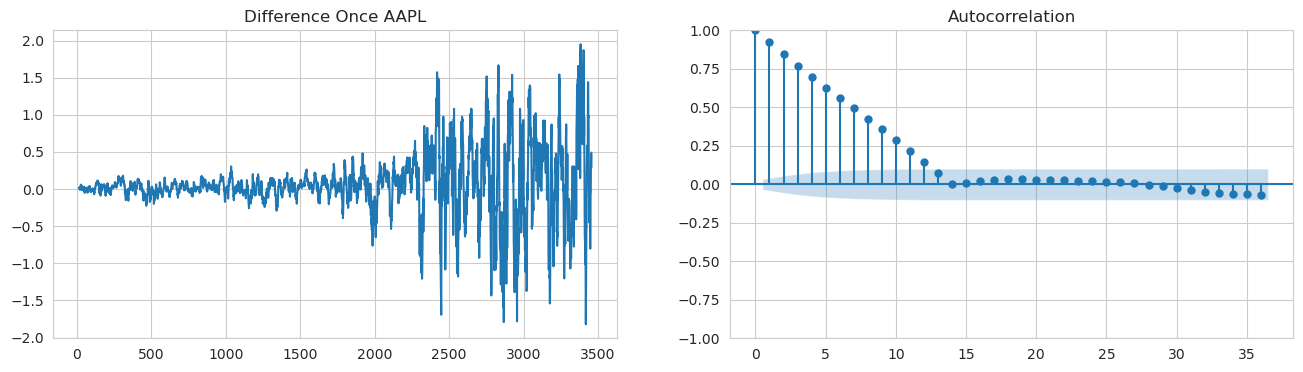

In [64]:
for i in range(len(df_close_sma)):
    diff1 = df_close_sma[i].Close.diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Difference Once {stock_symbols[i]}")
    plot_acf(diff1, ax=ax2);

In [68]:
ndif = [ndiffs(df_close_sma[i], test="adf") for i in range(len(df_close_sma))]
print("ndif", ndif)

ndif [1, 1, 1, 1, 1]


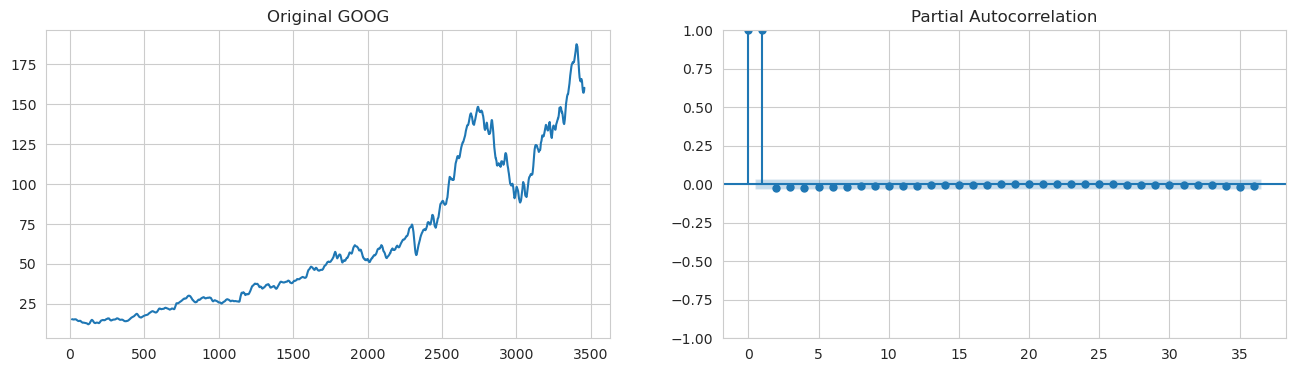

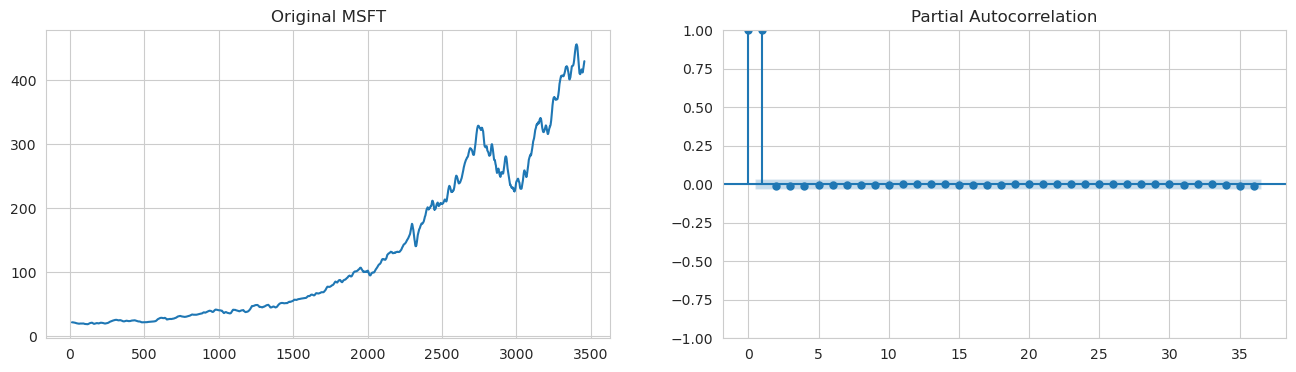

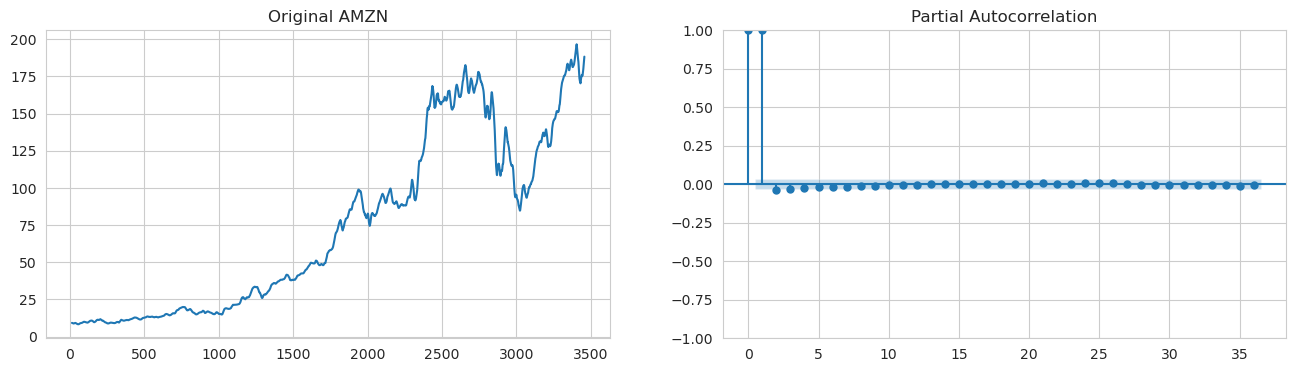

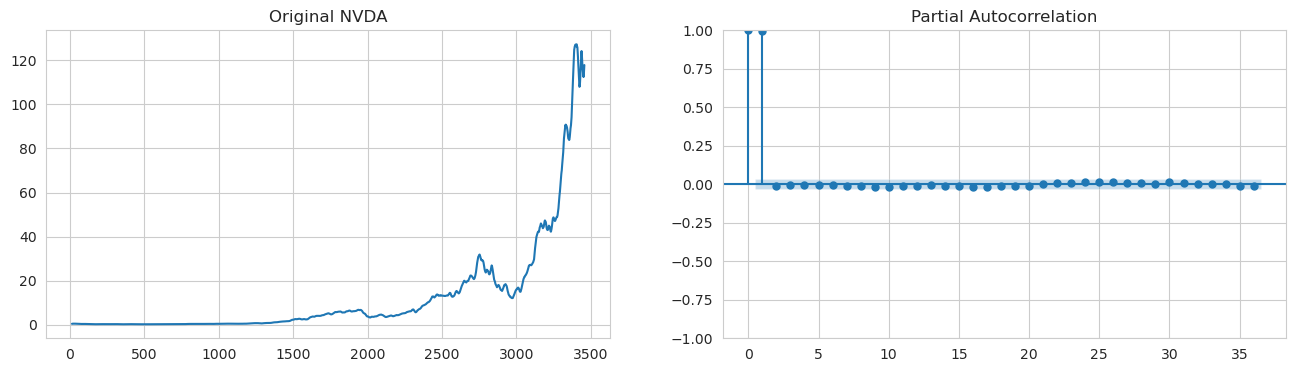

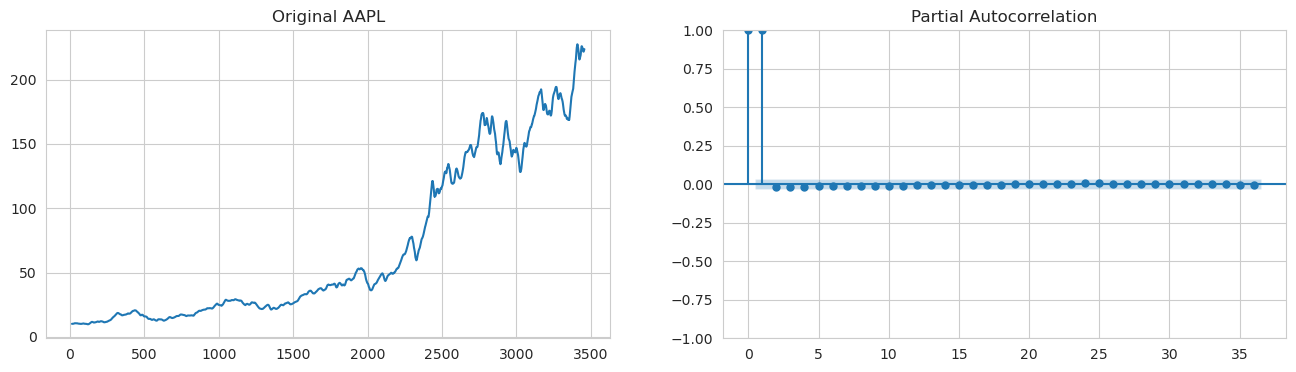

In [65]:
for i in range(len(df_close_sma)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(df_close_sma[i].Close)
    ax1.set_title(f"Original {stock_symbols[i]}")
    plot_pacf(df_close_sma[i].Close, ax=ax2);

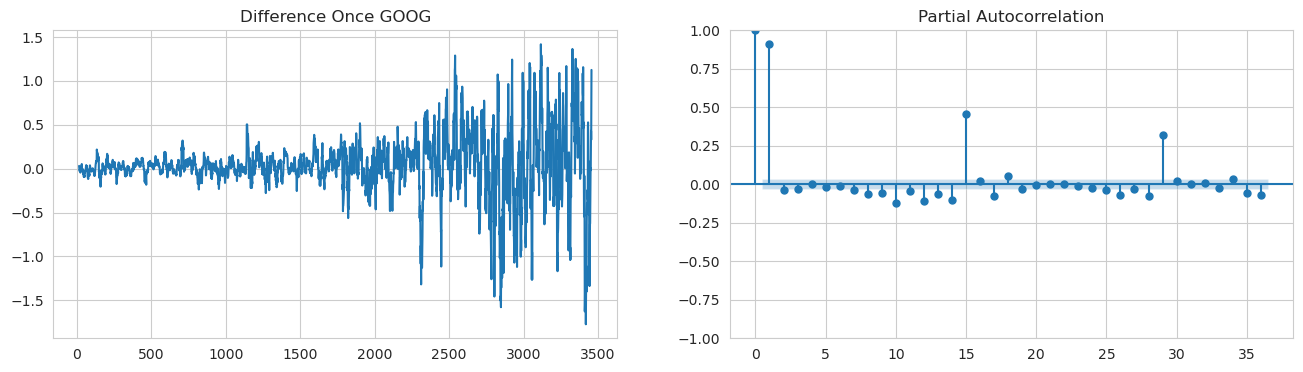

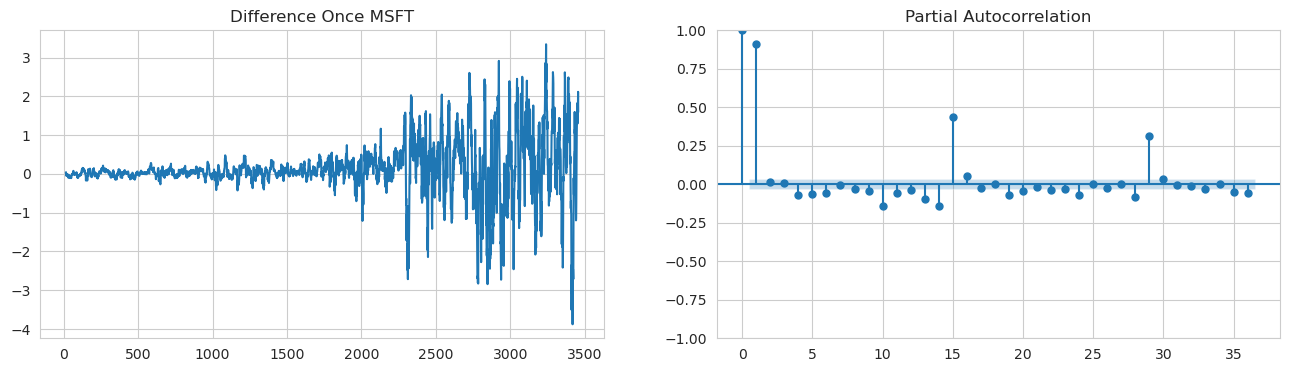

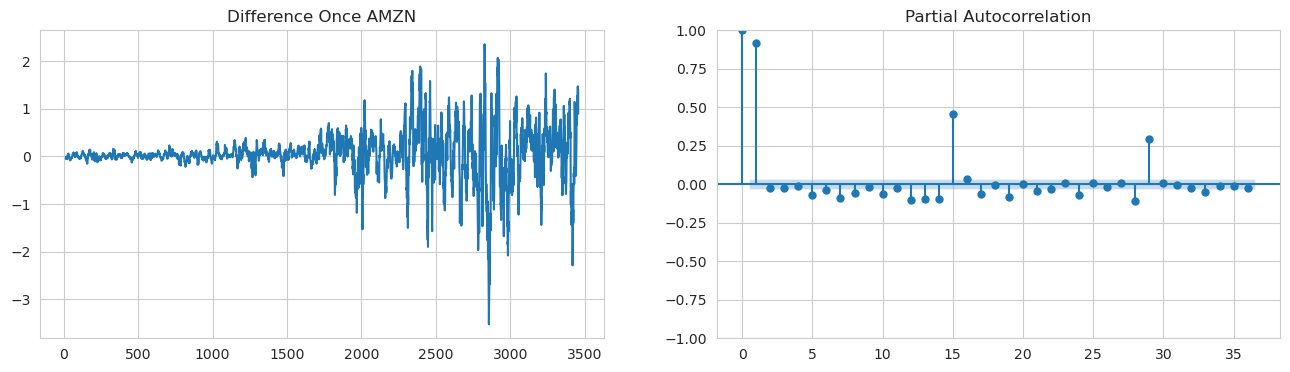

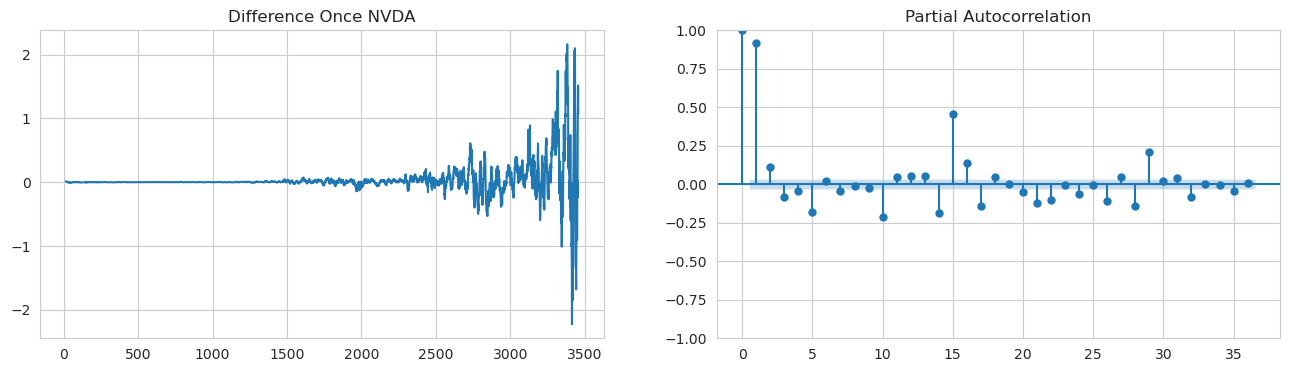

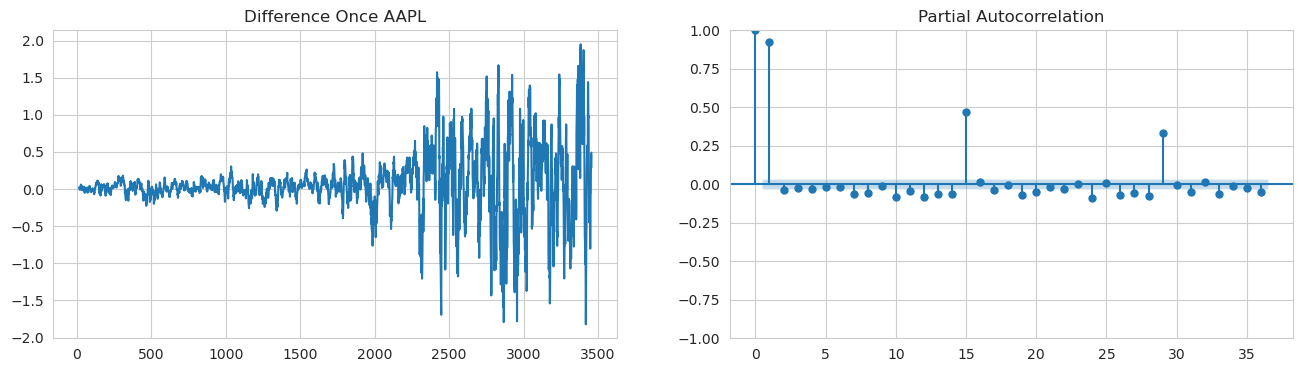

In [66]:
for i in range(len(df_close_sma)):
    diff1 = df_close_sma[i].Close.diff().dropna()

    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Difference Once {stock_symbols[i]}")
    plot_pacf(diff1, ax=ax2);

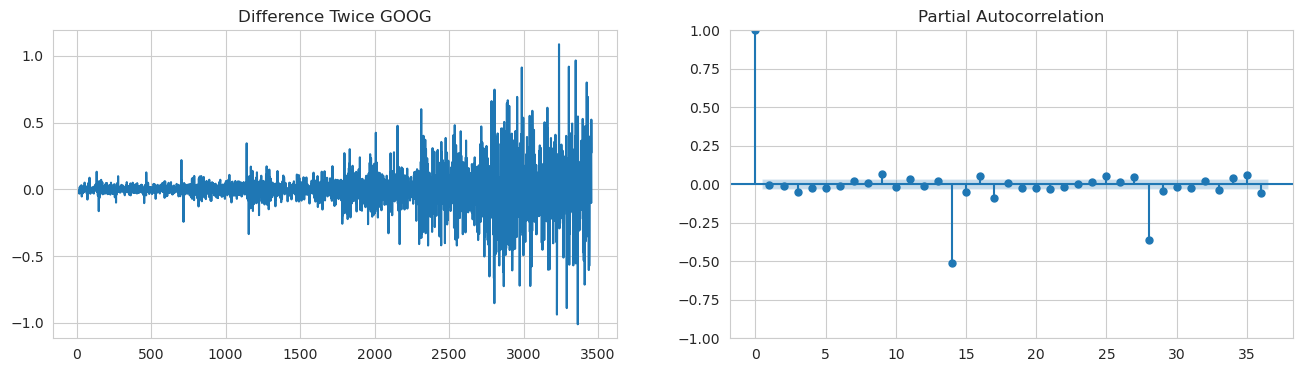

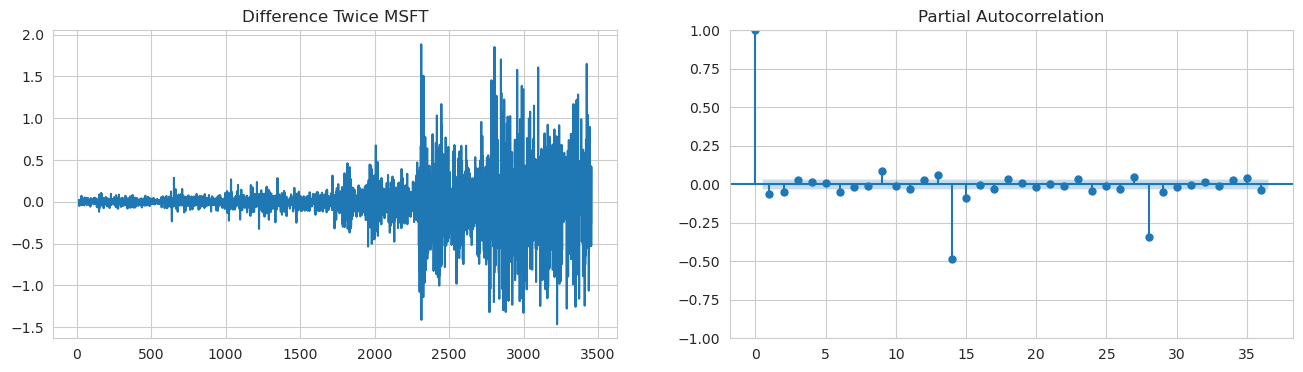

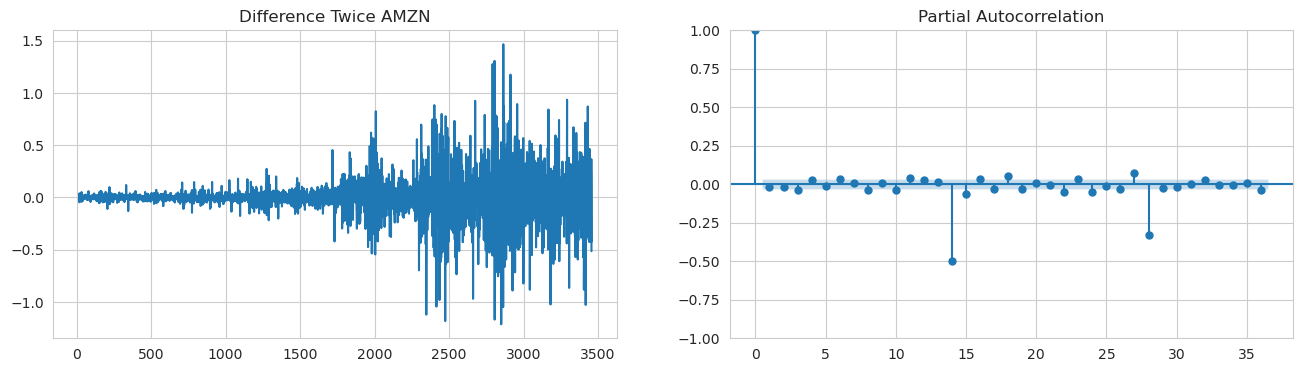

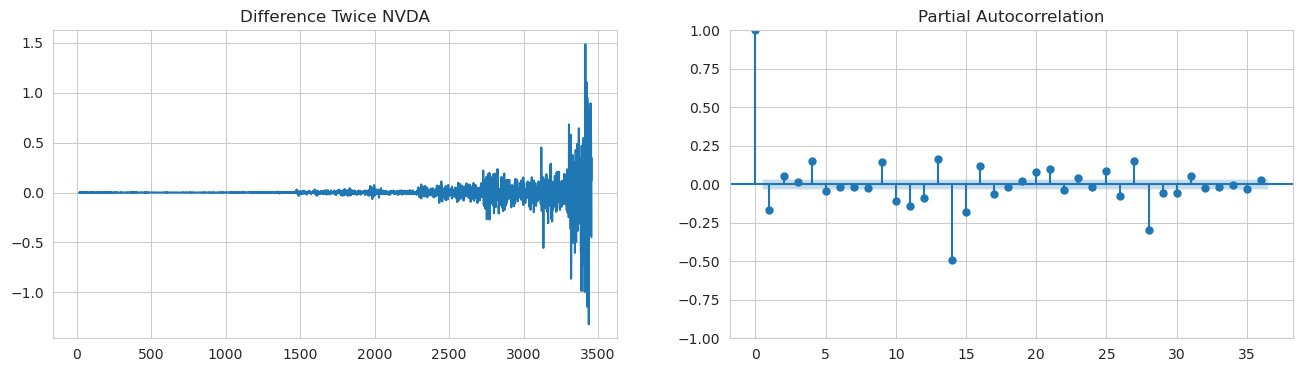

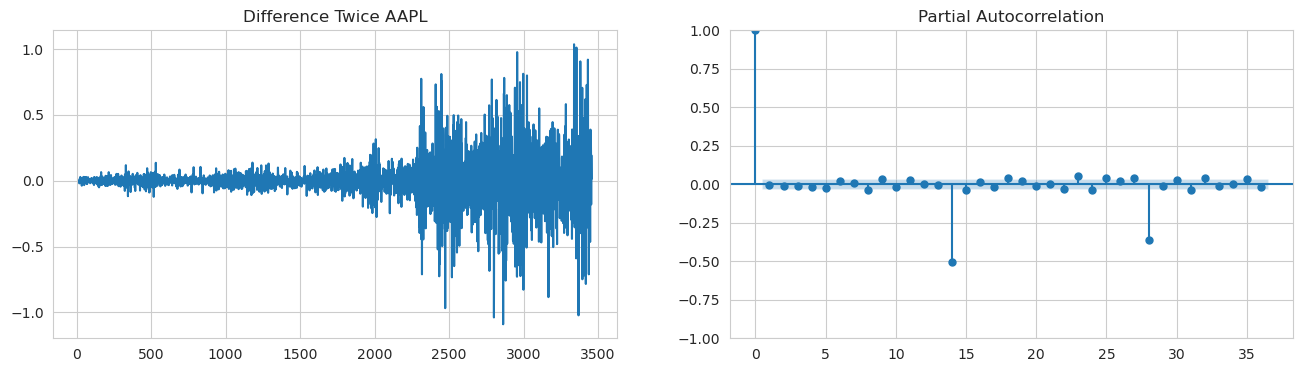

In [69]:
for i in range(len(df_close_sma)):
    diff2 = df_close_sma[i].Close.diff().diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff2)
    ax1.set_title(f"Difference Twice {stock_symbols[i]}")
    plot_pacf(diff2, ax=ax2);

In [71]:
# orderr = auto_arima(df[0].Close, trace=True).get_params().get("order")
# print(orderr)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12156.413, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12154.912, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12154.797, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12157.727, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12156.168, Time=2.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12155.779, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12150.697, Time=2.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12150.076, Time=2.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12149.251, Time=0.81 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=12151.027, Time=0.97 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12149.240, Time=5.65 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=12151.053, Time=5.92 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=12151.368, Time=4.06 sec
 ARIMA(0,1,5)(0,0,0)[0] i

In [70]:
arima_order = {}
for i in range(len(df_close_sma)):
    print(f"Stock name: {stock_symbols[i]}")
    arima_order[i] = auto_arima(df_close_sma[i].Close, trace=True).get_params().get("order")
    print(f"ARIMA Order for {stock_symbols[i]}: {arima_order[i]}")

Stock name: GOOG
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3767.204, Time=2.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2285.281, Time=0.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3761.564, Time=1.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-641.382, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2336.530, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3769.184, Time=1.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2076.292, Time=2.76 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3765.523, Time=1.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3767.210, Time=7.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2775.371, Time=3.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3790.992, Time=3.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3766.048, Time=0.71 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3767.470, Time=5.91 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-3769.321, Time=3.01 sec
 ARIM

In [71]:
arima_result = {}
for i in range(len(df_close_sma)):
    model = sm.ARIMA(df_close_sma[i].Close, order=arima_order[i])
    arima_result[i] = model.fit()
    print(f"\n ARIMA Results for {stock_symbols[i]}:\n {arima_result[i].summary()}")


 ARIMA Results for GOOG:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3443
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1898.859
Date:                Sun, 17 Nov 2024   AIC                          -3789.718
Time:                        17:34:11   BIC                          -3765.142
Sample:                             0   HQIC                         -3780.940
                               - 3443                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8199      0.022     84.002      0.000       1.777       1.862
ar.L2         -0.8362      0.019    -43.474      0.000      -0.874      -0.799
ma.L1         -0.8713    

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 ARIMA Results for NVDA:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3443
Model:                 ARIMA(5, 2, 1)   Log Likelihood                3199.367
Date:                Sun, 17 Nov 2024   AIC                          -6384.734
Time:                        17:34:22   BIC                          -6341.730
Sample:                             0   HQIC                         -6369.373
                               - 3443                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8151      0.006    142.890      0.000       0.804       0.826
ar.L2          0.1928      0.006     33.727      0.000       0.182       0.204
ar.L3         -0.0152    

In [76]:
# result.forecast(10)
# residuals = pd.DataFrame(result.resid)

In [78]:
# fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
# ax1.plot(pd.DataFrame(result.resid))
# ax2.hist(pd.DataFrame(result.resid), density=True)


 ARIMA Residuals for GOOG:


 ARIMA Residuals for MSFT:


 ARIMA Residuals for AMZN:


 ARIMA Residuals for NVDA:


 ARIMA Residuals for AAPL:



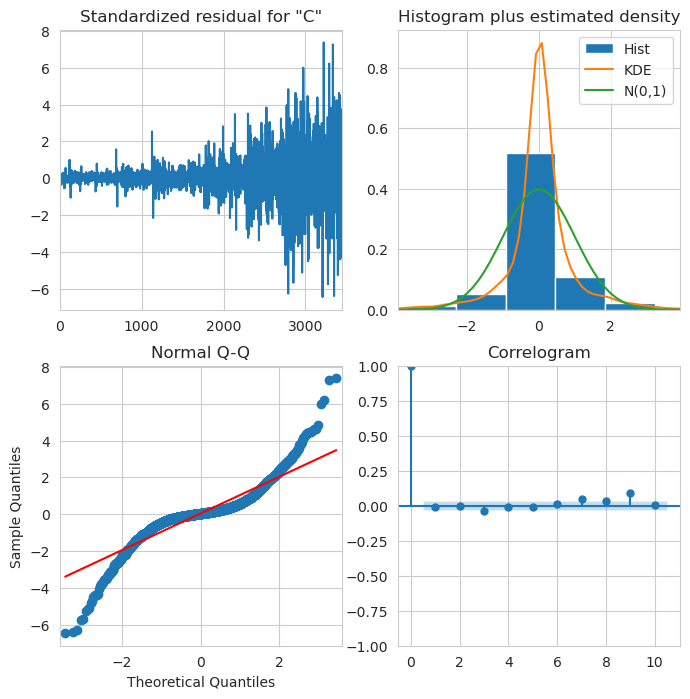

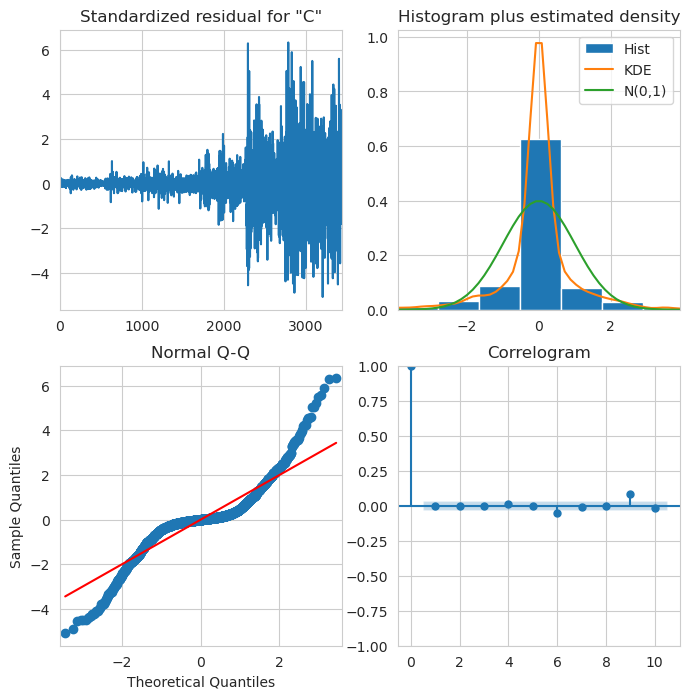

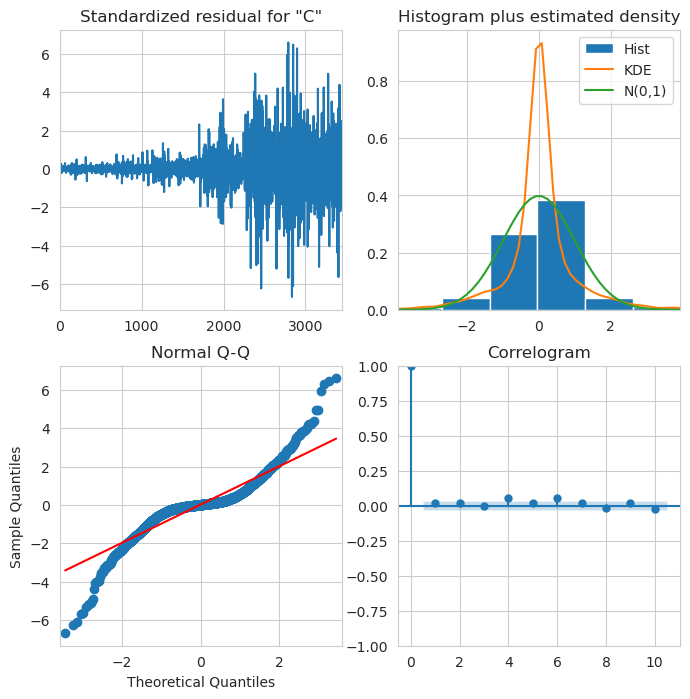

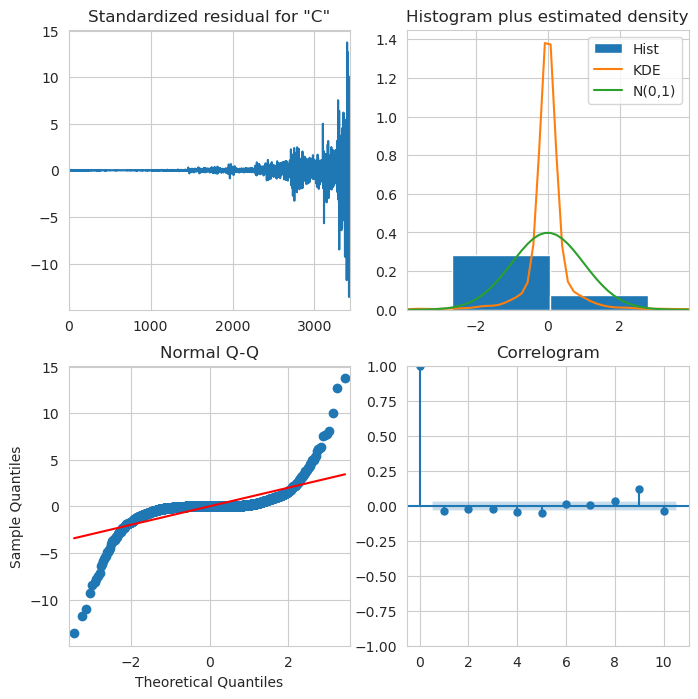

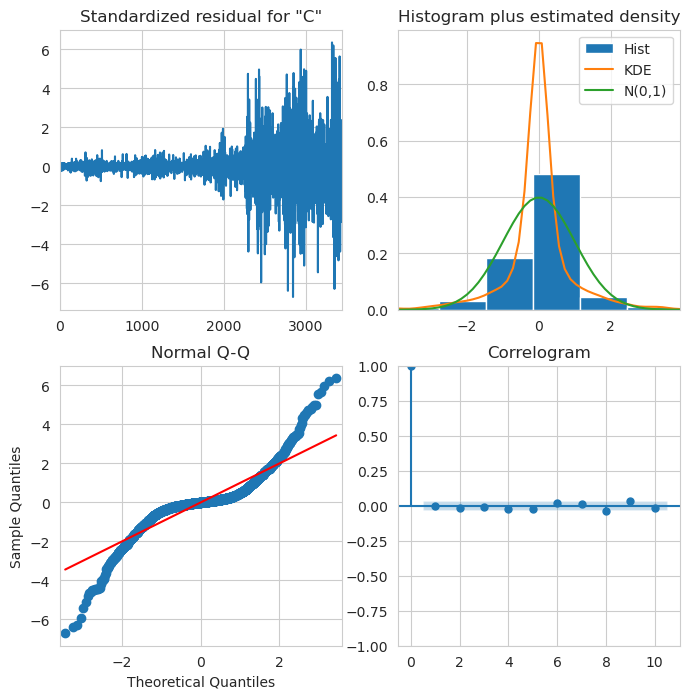

In [72]:
for i in range(len(df_close_sma)):
    arima_result[i].plot_diagnostics(figsize = (8,8))
    print(f"\n ARIMA Residuals for {stock_symbols[i]}:\n")



 Last 100 days stock Closing price for GOOG


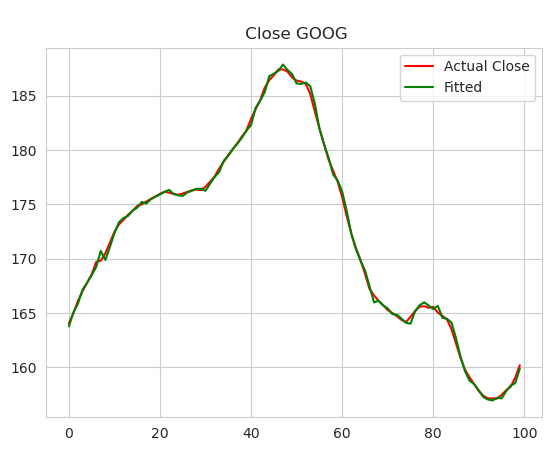


 Last 100 days stock Closing price for MSFT


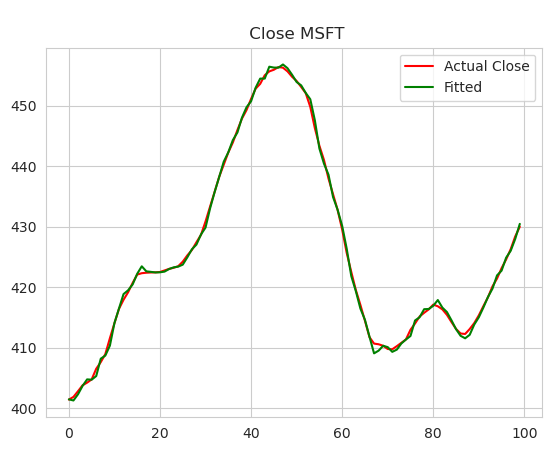


 Last 100 days stock Closing price for AMZN


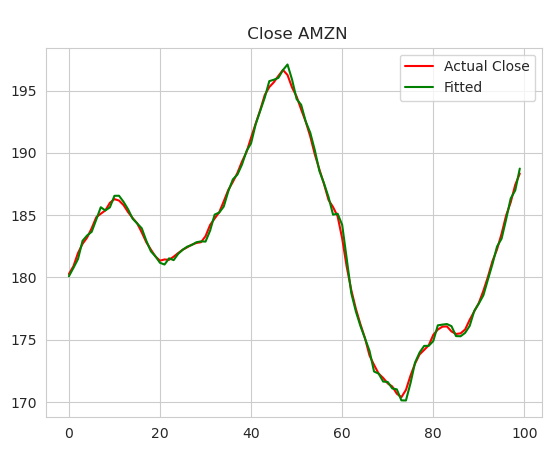


 Last 100 days stock Closing price for NVDA


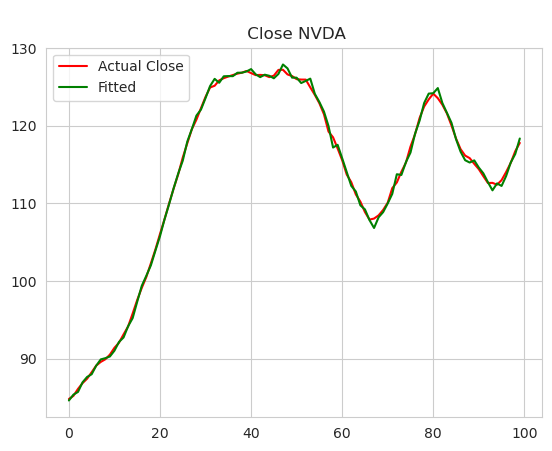


 Last 100 days stock Closing price for AAPL


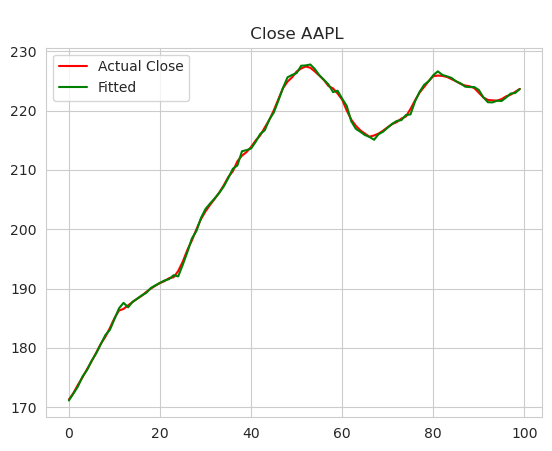

In [73]:
for i in range(len(df_close_sma)):
    print(f"\n Last 100 days stock Closing price for {stock_symbols[i]}")
    plt.plot(range(100), df_close_sma[i].Close[(len(df_close_sma[i])-100):], color='r', label='Actual Close')
    plt.plot(range(100), arima_result[i].fittedvalues[(len(df_close_sma[i])-100):], color='g', label='Fitted')
    plt.legend()
    plt.title(f"\n Close {stock_symbols[i]}")
    plt.show()

In [83]:
train = {}
test = {}
for i in range(len(df_close_sma)):
    n = 0
    n = int(len(df_close_sma[i])*0.95)
    train[i] = df_close_sma[i][:n]
    test[i] = df_close_sma[i][n:]
    print(len(train[i]), len(test[i]))

3270 173
3270 173
3270 173
3270 173
3270 173


In [75]:
for i in range(len(df_close_sma)):
    result = adfuller(train[i].Close.dropna())
    print(f"For {stock_symbols[i]}")
    print(f'ADF statistic: {result[0]}')
    print(f'p-value: {result[1]}')

For GOOG
ADF statistic: 0.42072283483248085
p-value: 0.9822535768095777
For MSFT
ADF statistic: 1.7050298993146094
p-value: 0.9981408259427789
For AMZN
ADF statistic: -0.5687811612835565
p-value: 0.877881333008081
For NVDA
ADF statistic: 3.2937338279716997
p-value: 1.0
For AAPL
ADF statistic: 0.8535144942900784
p-value: 0.9924526787048981


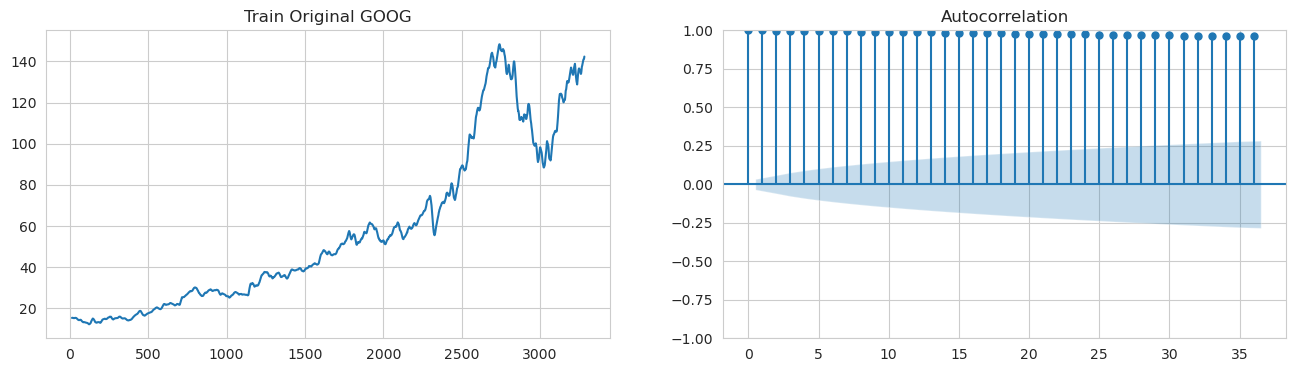

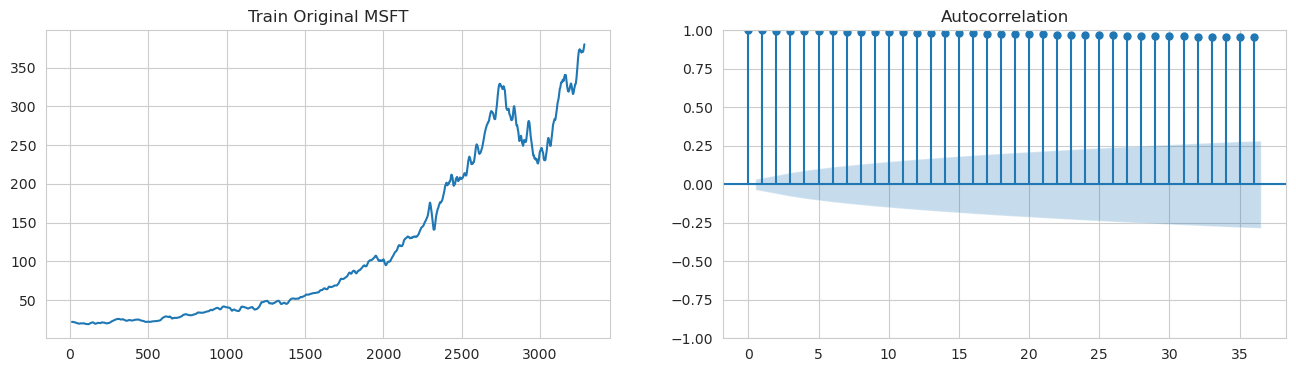

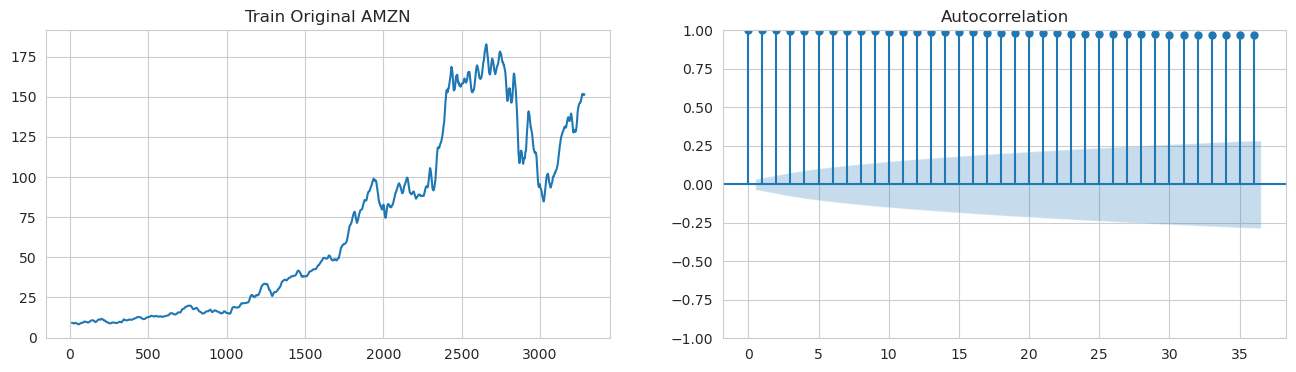

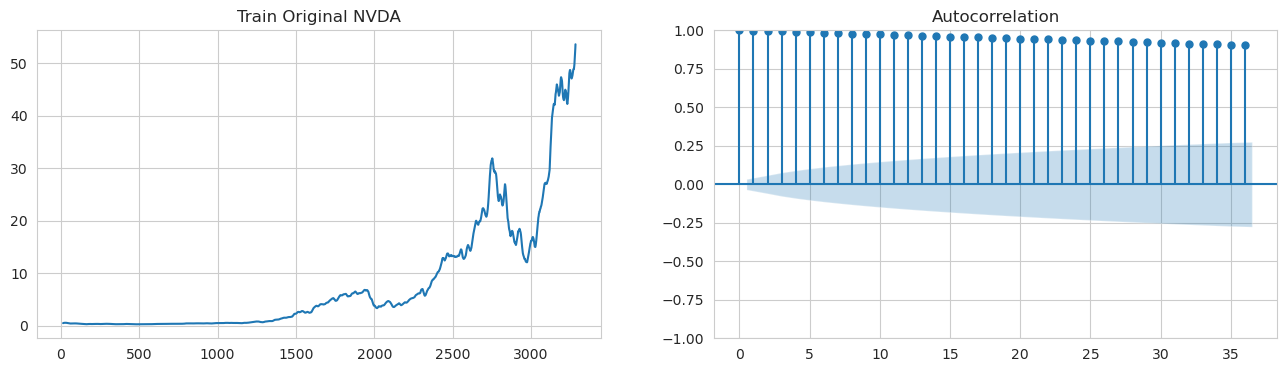

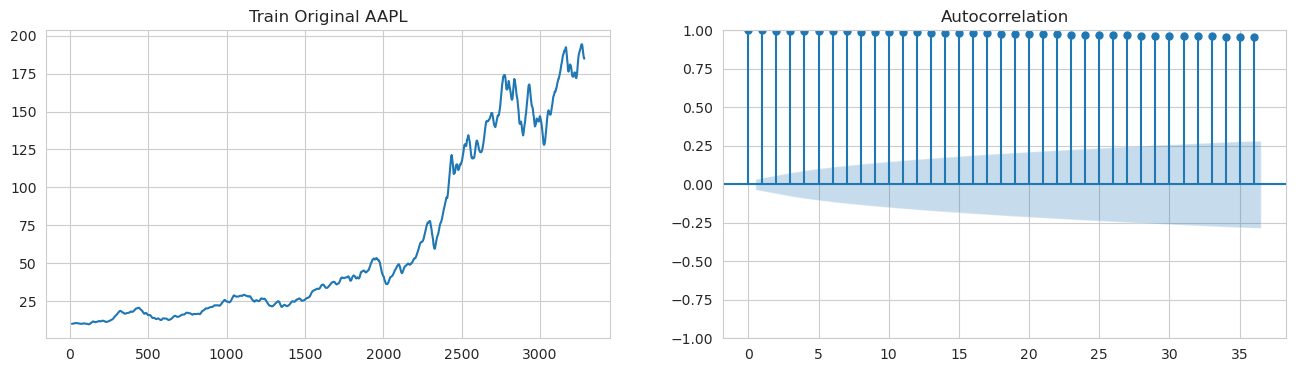

In [77]:
for i in range(len(train)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(train[i].Close)
    ax1.set_title(f"Train Original {stock_symbols[i]}")
    plot_acf(train[i].Close, ax=ax2);

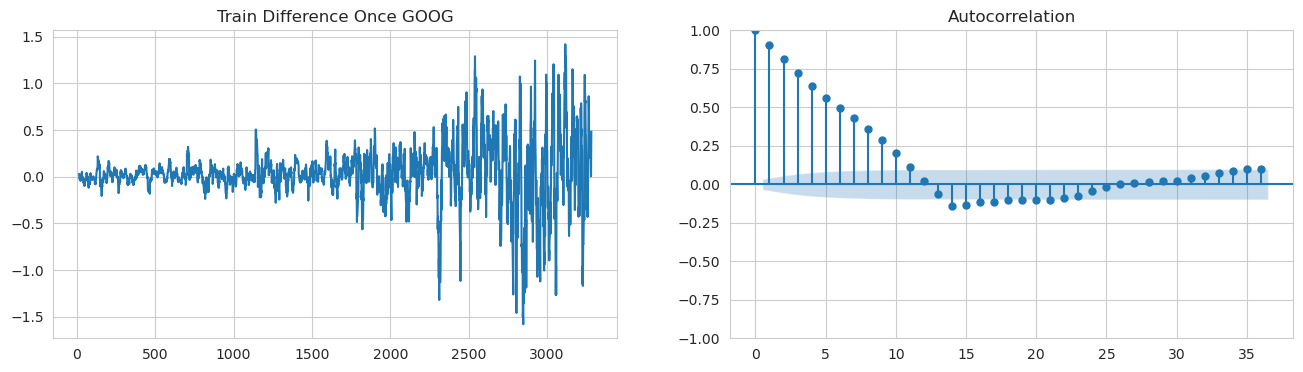

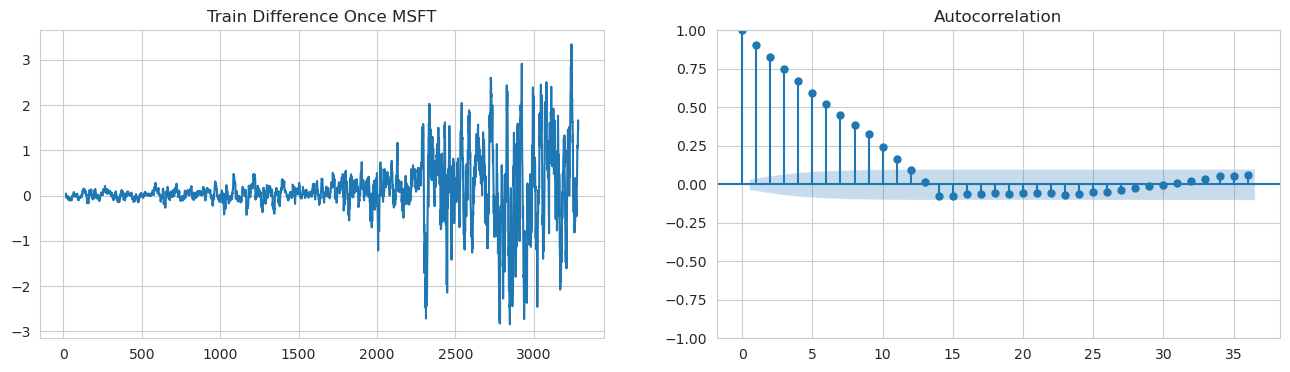

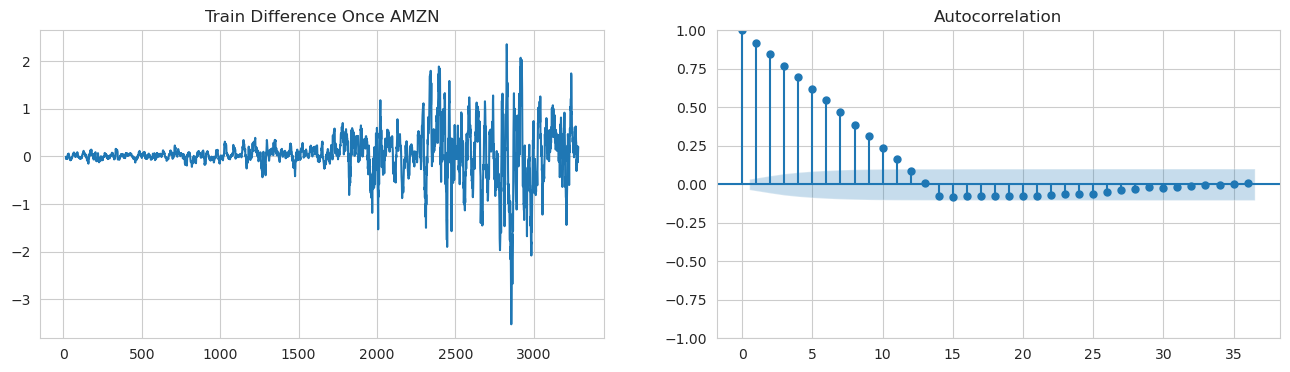

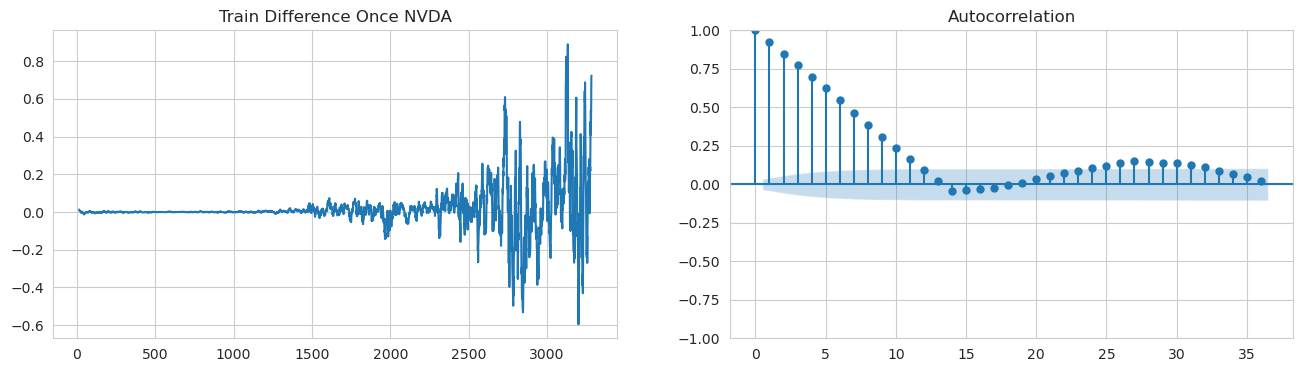

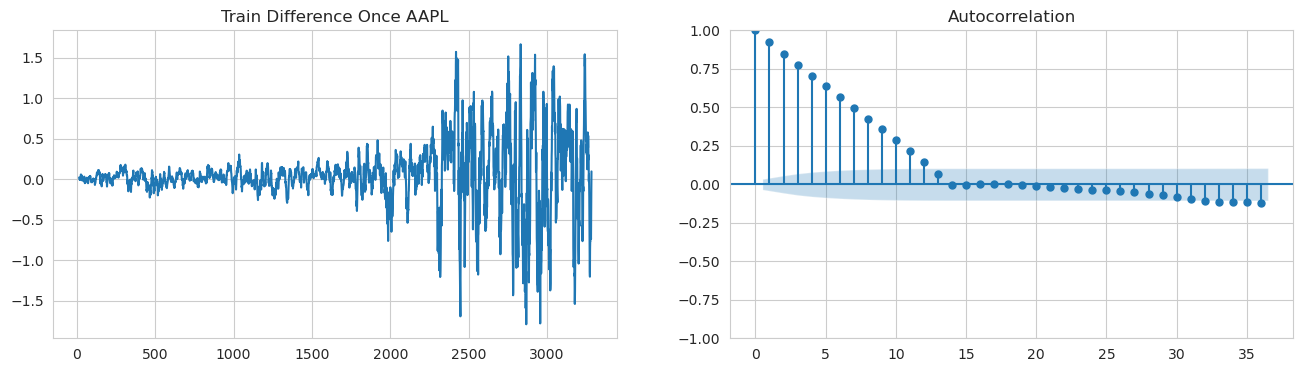

In [78]:
for i in range(len(train)):
    diff1 = train[i].Close.diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Train Difference Once {stock_symbols[i]}")
    plot_acf(diff1, ax=ax2);

In [79]:
ndif_train = [ndiffs(train[i].Close, test="adf") for i in range(len(df))]
print("ndif_train", ndif_train)

ndif_train [1, 1, 1, 1, 1]


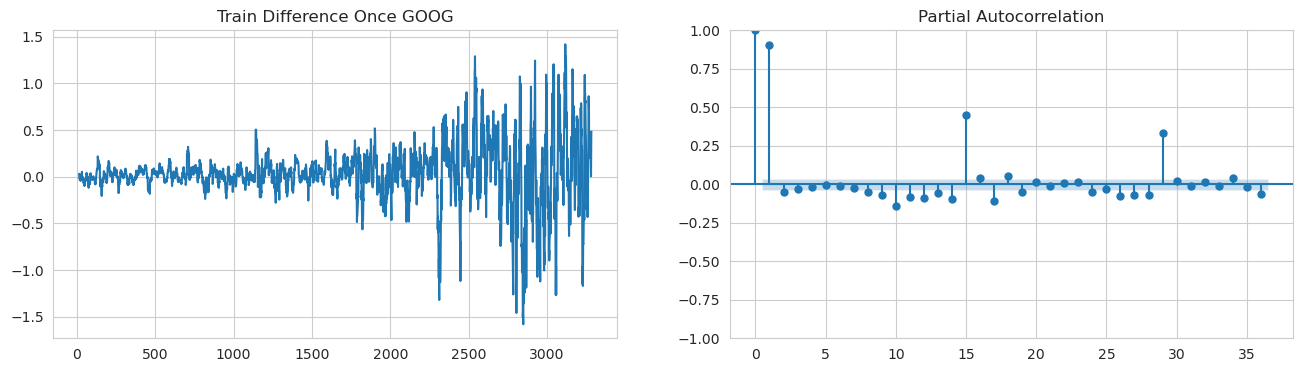

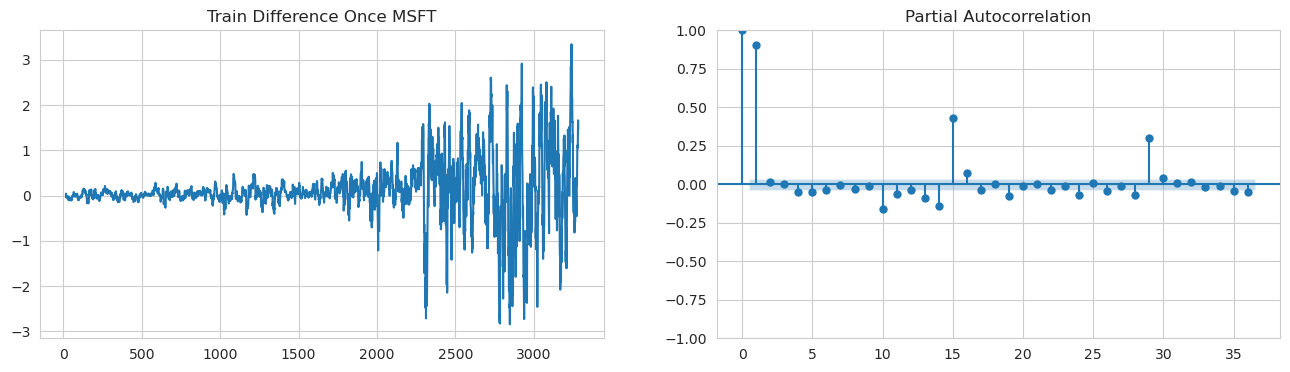

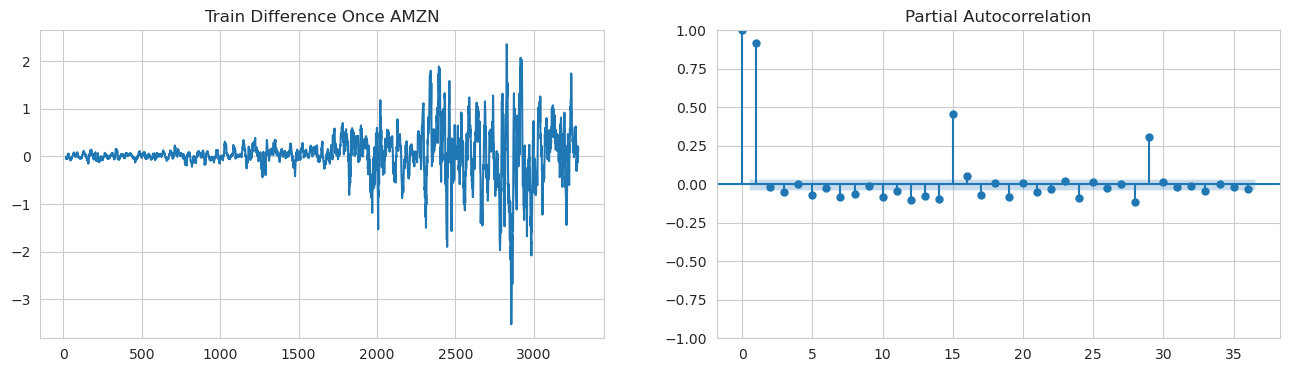

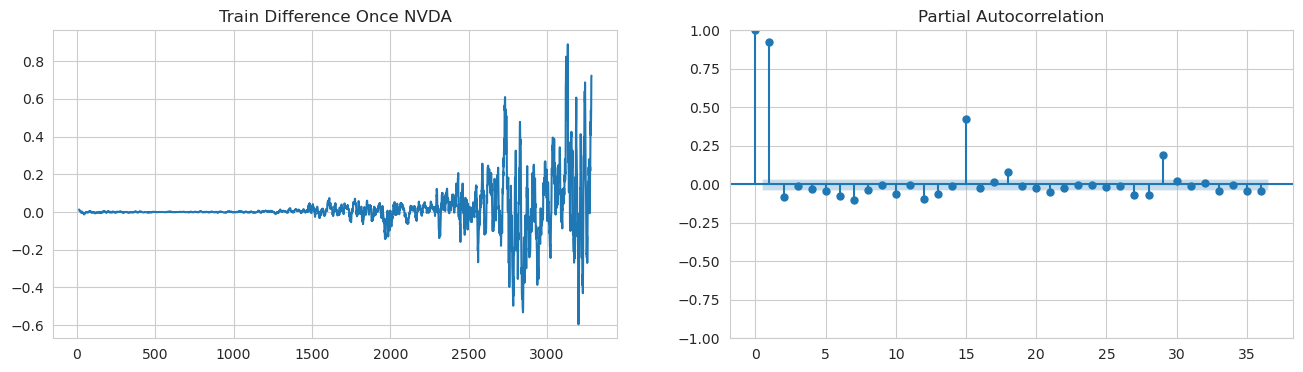

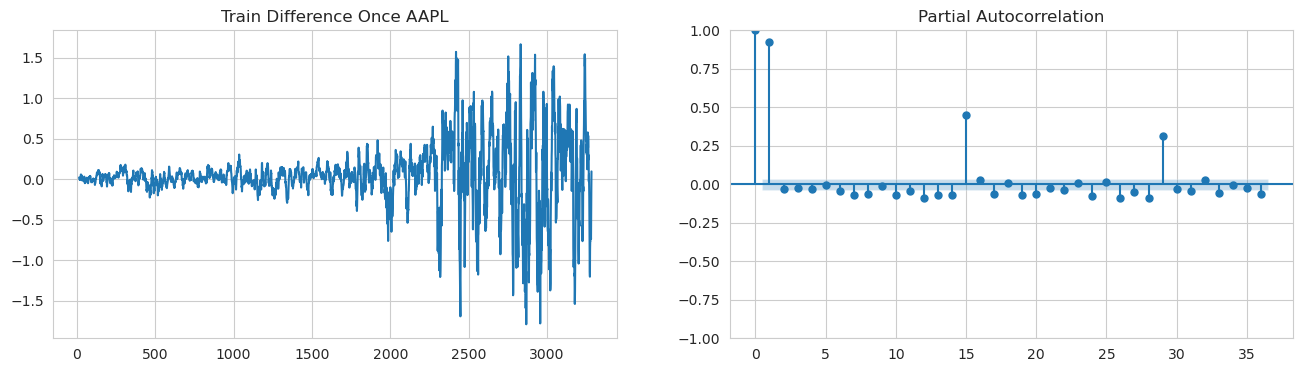

In [80]:
for i in range(len(df)):
    diff1 = train[i].Close.diff().dropna() 
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Train Difference Once {stock_symbols[i]}")
    plot_pacf(diff1, ax=ax2);

In [84]:
arima_order_train = {}
for i in range(len(train)):
    print(f"Stock name: {stock_symbols[i]}")
    arima_order_train[i] = auto_arima(train[i].Close, trace=True).get_params().get("order")
    print(f"Training Set ARIMA Order for {stock_symbols[i]}: {arima_order_train[i]}")

Stock name: GOOG
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4240.062, Time=7.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1459.356, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4208.998, Time=2.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1332.708, Time=2.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1510.905, Time=0.69 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4216.735, Time=1.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4242.094, Time=6.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4215.054, Time=1.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4215.655, Time=0.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-4236.390, Time=8.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-4217.382, Time=0.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=23.56 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-4238.249, Time=2.81 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 58.851 second

In [85]:
arima_result_train = {}
for i in range(len(train)):
    model_train = sm.ARIMA(train[i].Close, order=arima_order_train[i])
    arima_result_train[i] = model_train.fit()
    print(f"\n Training Set ARIMA Results for {stock_symbols[i]}:\n {arima_result_train[i].summary()}")


 Training Set ARIMA Results for GOOG:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3270
Model:                 ARIMA(2, 1, 1)   Log Likelihood                2123.125
Date:                Sun, 17 Nov 2024   AIC                          -4238.249
Time:                        17:48:22   BIC                          -4213.880
Sample:                             0   HQIC                         -4229.522
                               - 3270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8149      0.022     83.252      0.000       1.772       1.858
ar.L2         -0.8323      0.019    -43.055      0.000      -0.870      -0.794
ma.L1       

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 Training Set ARIMA Results for NVDA:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3270
Model:                 ARIMA(2, 2, 2)   Log Likelihood                5739.615
Date:                Sun, 17 Nov 2024   AIC                         -11469.229
Time:                        17:48:38   BIC                         -11438.769
Sample:                             0   HQIC                        -11458.320
                               - 3270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5818      0.018    -87.915      0.000      -1.617      -1.547
ar.L2         -0.8104      0.018    -44.088      0.000      -0.846      -0.774
ma.L1       

In [102]:
step_30=[30 for i in range(len(df))]
step=[len(test[i]) for i in range(len(df))]
step_30, step

([30, 30, 30, 30, 30], [173, 173, 173, 173, 173])

In [103]:
conf_int_30 = {}
fc_30 = {}
lower_30 = {}
upper_30 = {}
for i in range(len(df)):
    conf_int_30[i] = arima_result_train[i].get_forecast(step_30[i]).conf_int()
    fc_30[i] = pd.Series(arima_result_train[i].forecast(step_30[i]), index = test[i][:step_30[i]].index)
    lower_30[i] = pd.Series(conf_int_30[i]['lower Close'], index = test[i][:step_30[i]].index)
    upper_30[i] = pd.Series(conf_int_30[i]['upper Close'], index = test[i][:step_30[i]].index)
    # print(conf_int[i])

In [96]:
conf_int = {}
fc = {}
lower = {}
upper = {}
for i in range(len(df)):
    conf_int[i] = arima_result_train[i].get_forecast(step[i]).conf_int()
    fc[i] = pd.Series(arima_result_train[i].forecast(step[i]), index = test[i][:step[i]].index)
    lower[i] = pd.Series(conf_int[i]['lower Close'], index = test[i][:step[i]].index)
    upper[i] = pd.Series(conf_int[i]['upper Close'], index = test[i][:step[i]].index)
    # print(conf_int[i])

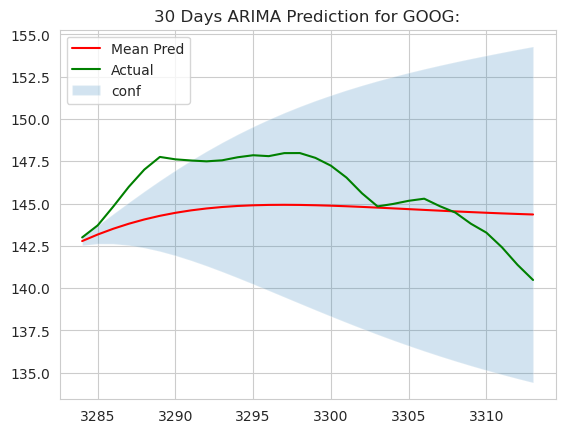

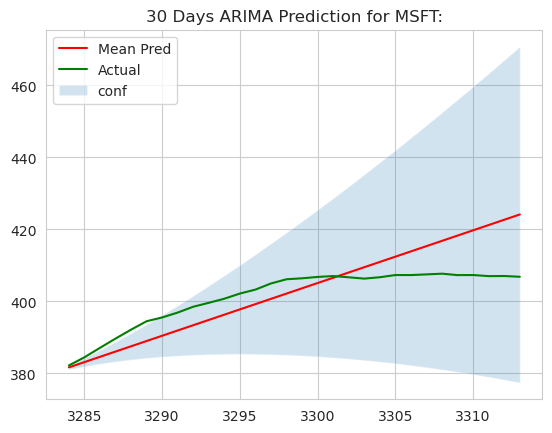

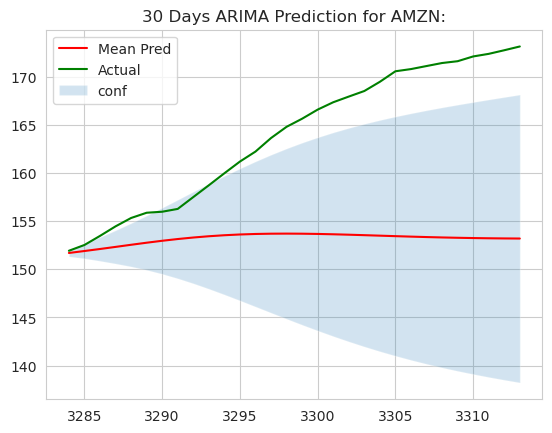

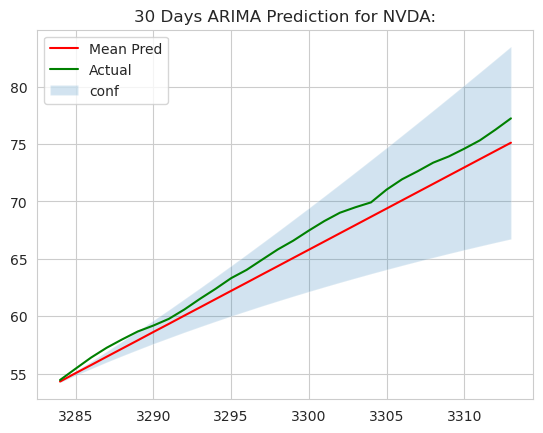

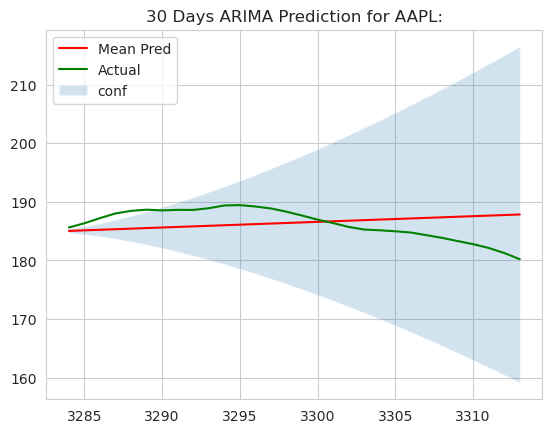

In [104]:
for i in range(len(df)):
    plt.plot(arima_result_train[i].forecast(step_30[i]), color='r', label='Mean Pred')
    plt.plot(test[i][:step_30[i]], color='g', label='Actual')
    plt.fill_between(lower_30[i].index, lower_30[i], upper_30[i], alpha = 0.2, label='conf')
    plt.legend()
    plt.title(f"30 Days ARIMA Prediction for {stock_symbols[i]}:")
    plt.show()

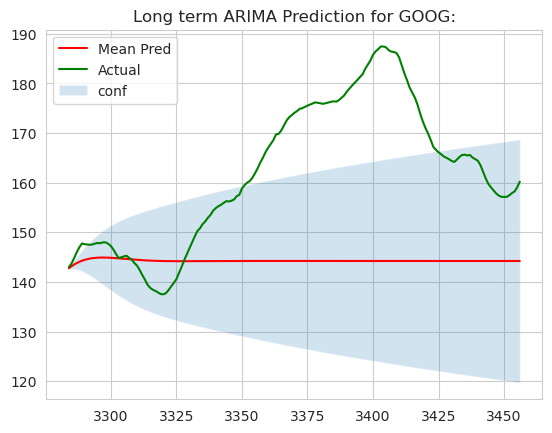

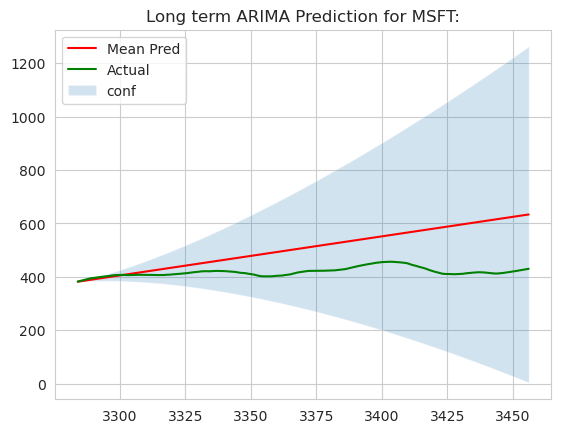

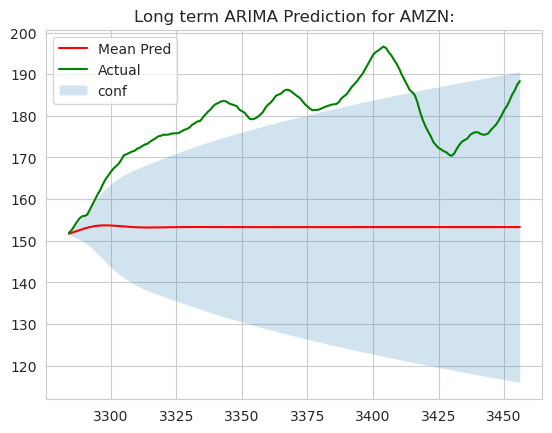

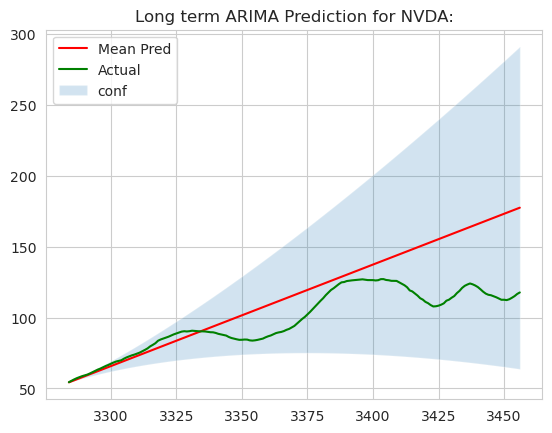

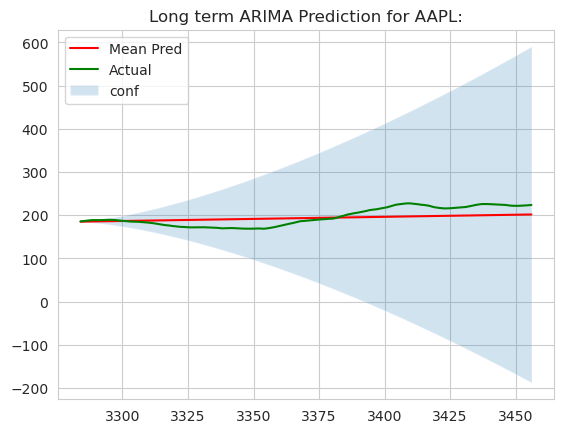

In [98]:
for i in range(len(df)):
    plt.plot(arima_result_train[i].forecast(step[i]), color='r', label='Mean Pred')
    plt.plot(test[i][:step[i]], color='g', label='Actual')
    plt.fill_between(lower[i].index, lower[i], upper[i], alpha = 0.2, label='conf')
    plt.legend()
    plt.title(f"Long term ARIMA Prediction for {stock_symbols[i]}:")
    plt.show()